In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matrixprofile as mp
%matplotlib inline
import pywt

In [3]:
df = pd.read_csv (r'C:\Users\conal\Documents\GitHub\Ethereum-Block-data\results.csv')
df = df.drop(df.index[69887])
df['datetime'] = pd.to_datetime(df['created_ts'], unit='s')
df = df[['datetime', "gas_avg_price"]]

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,3,4,6,7,8,9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
len(df)

219887

In [5]:
df.sort_values('datetime').datetime.diff().max()

Timedelta('0 days 00:02:41')

Downsample to 3min intervals, convert price to gwei

In [6]:
df = df[['datetime', "gas_avg_price"]]
format = '%Y-%m-%d %H:%M:%S'
df = df.set_index('datetime')
df = df.squeeze()
df = df.astype('float')
df = df.resample('3T').mean()
df = df.apply(lambda x: x*1000000000)



In [14]:
df.to_csv(r'C:\Users\conal\Documents\GitHub\Ethereum-Block-data\gwei_3min_avg')

In [7]:
df = df.to_numpy()

D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


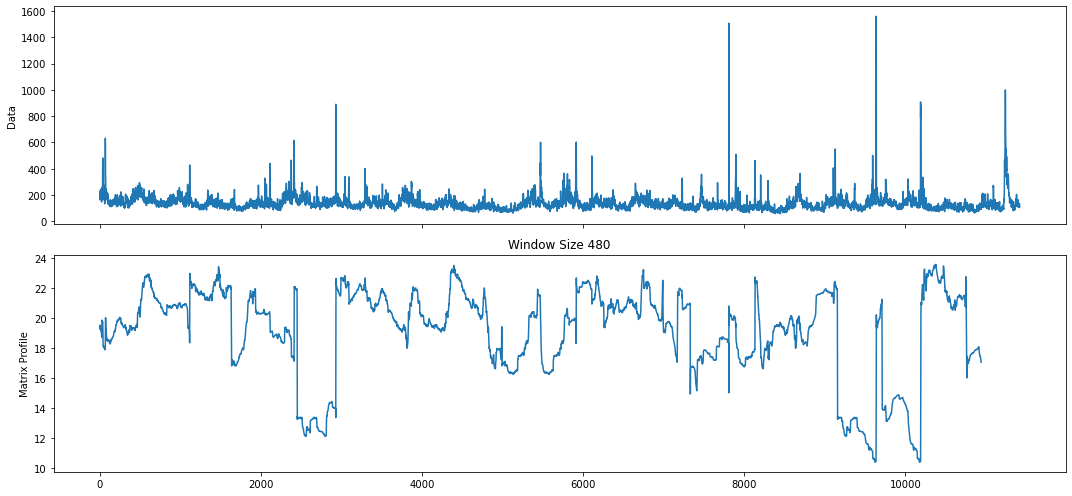

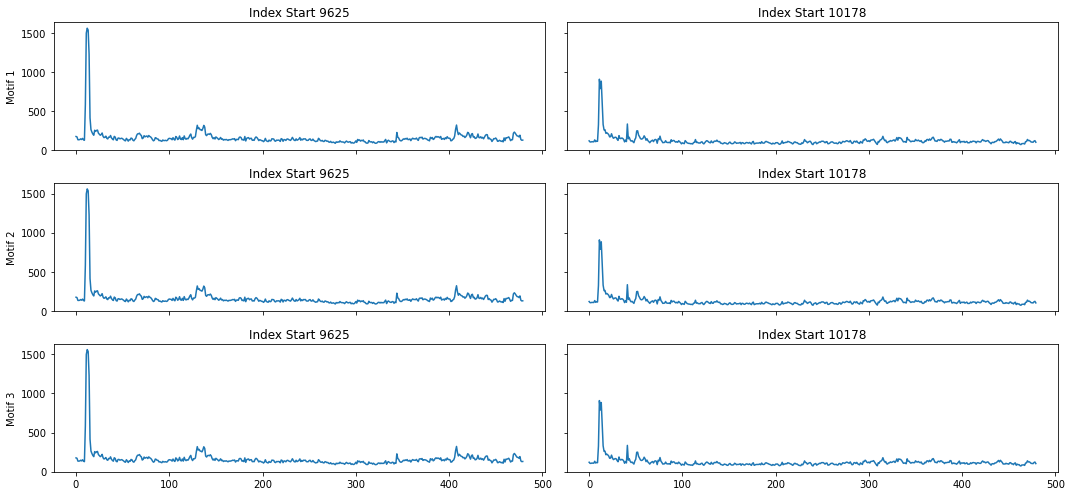

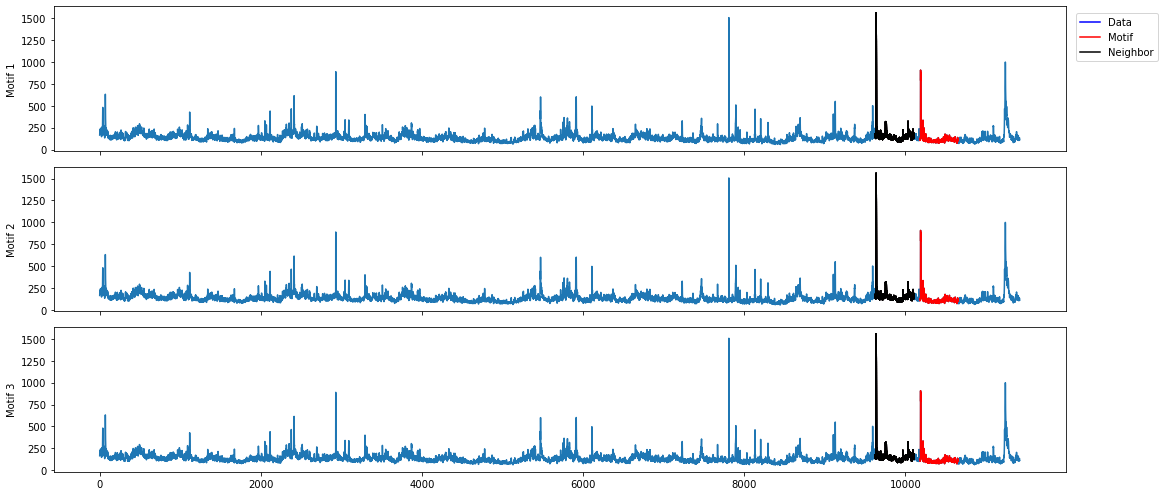

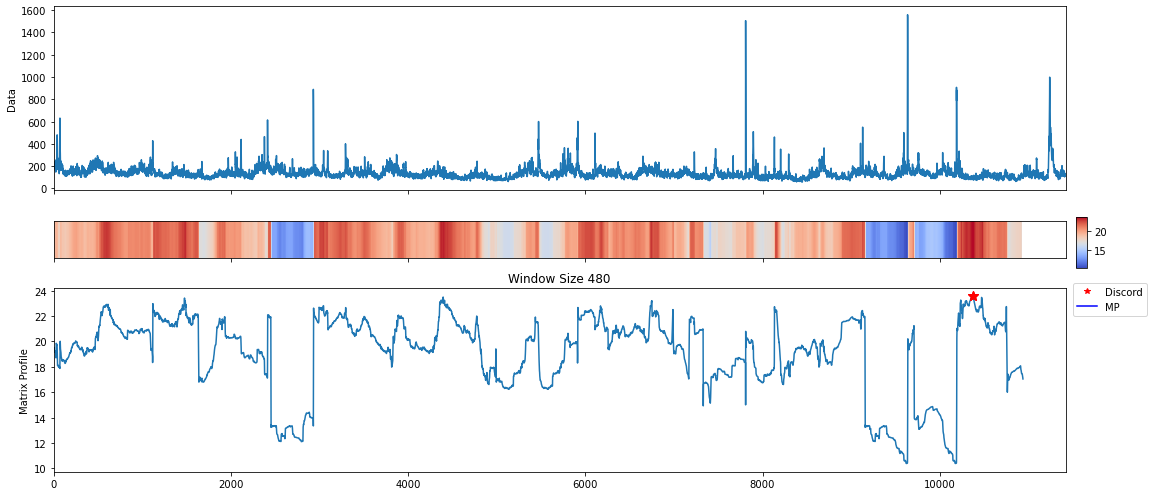

In [8]:
mp_profile, mp_figures = mp.analyze(df, windows=480)

In [9]:
wavelets = ['coif4', 'db4', 'haar', 'sym4']

wavelet = 'db12'

In [10]:
cA1, cD1 = pywt.dwt(df, wavelet)
cA2, cD2 = pywt.dwt(cA1, wavelet)
cA3, cD3 = pywt.dwt(cA2, wavelet)
cA4, cD4 = pywt.dwt(cA3, wavelet)
cA5, cD5 = pywt.dwt(cA4, wavelet)
cA6, cD6 = pywt.dwt(cA5, wavelet)
cA7, cD7 = pywt.dwt(cA6, wavelet)
cA8, cD8 = pywt.dwt(cA7, wavelet)
cA9, cD9 = pywt.dwt(cA8, wavelet)
cA10, cD10 = pywt.dwt(cA9, wavelet)

In [11]:
def dwt(df, wavelet):
    cA1, cD1 = pywt.dwt(df, wavelet, mode='symmetric')
    cA2, cD2 = pywt.dwt(cA1, wavelet, mode='symmetric')
    cA3, cD3 = pywt.dwt(cA2, wavelet, mode='symmetric')
    cA4, cD4 = pywt.dwt(cA3, wavelet, mode='symmetric')
    cA5, cD5 = pywt.dwt(cA4, wavelet, mode='symmetric')
    cA6, cD6 = pywt.dwt(cA5, wavelet, mode='symmetric')
    cA7, cD7 = pywt.dwt(cA6, wavelet, mode='symmetric')
    cA8, cD8 = pywt.dwt(cA7, wavelet, mode='symmetric')
    cA9, cD9 = pywt.dwt(cA8, wavelet, mode='symmetric')
    cA10, cD10 = pywt.dwt(cA9, wavelet, mode='symmetric')
    fig, axs = plt.subplots(10, 2)

    axs[0, 0].plot(cA1)
    axs[0, 0].set_title('Approximation 1' +str(wavelet))
    axs[0, 1].plot(cD1)
    axs[0, 1].set_title('Detail 1'  +str(wavelet))

    axs[1, 0].plot(cA2)
    axs[1, 0].set_title('Approximation 2' +str(wavelet))
    axs[1, 1].plot(cD2)
    axs[1, 1].set_title('Detail 2' +str(wavelet))

    axs[2, 0].plot(cA3)
    axs[2, 0].set_title('Approximation 3' +str(wavelet))
    axs[2, 1].plot(cD3)
    axs[2, 1].set_title('Detail 3'  +str(wavelet))

    axs[3, 0].plot(cA4)
    axs[3, 0].set_title('Approximation 4' +str(wavelet))
    axs[3, 1].plot(cD4)
    axs[3, 1].set_title('Detail 4'  +str(wavelet))

    axs[4, 0].plot(cA5)
    axs[4, 0].set_title('Approximation 5' +str(wavelet))
    axs[4, 1].plot(cD5)
    axs[4, 1].set_title('Detail 5'  +str(wavelet))

    axs[5, 0].plot(cA6)
    axs[5, 0].set_title('Approximation 6' +str(wavelet))
    axs[5, 1].plot(cD6)
    axs[5, 1].set_title('Detail 6'  +str(wavelet))

    axs[6, 0].plot(cA7)
    axs[6, 0].set_title('Approximation 7' +str(wavelet))
    axs[6, 1].plot(cD7)
    axs[6, 1].set_title('Detail 7'  +str(wavelet))

    axs[7, 0].plot(cA8)
    axs[7, 0].set_title('Approximation 8' +str(wavelet))
    axs[7, 1].plot(cD8)
    axs[7, 1].set_title('Detail 8'  +str(wavelet))

    axs[8, 0].plot(cA9)
    axs[8, 0].set_title('Approximation 9' +str(wavelet))
    axs[8, 1].plot(cD9)
    axs[8, 1].set_title('Detail 9'  +str(wavelet))

    axs[9, 0].plot(cA10)
    axs[9, 0].set_title('Approximation 10' +str(wavelet))
    axs[9, 1].plot(cD10)
    axs[9, 1].set_title('Detail 10'  +str(wavelet))

    fig.set_size_inches(20, 30)
    fig.tight_layout()

In [13]:
len(df)

11419

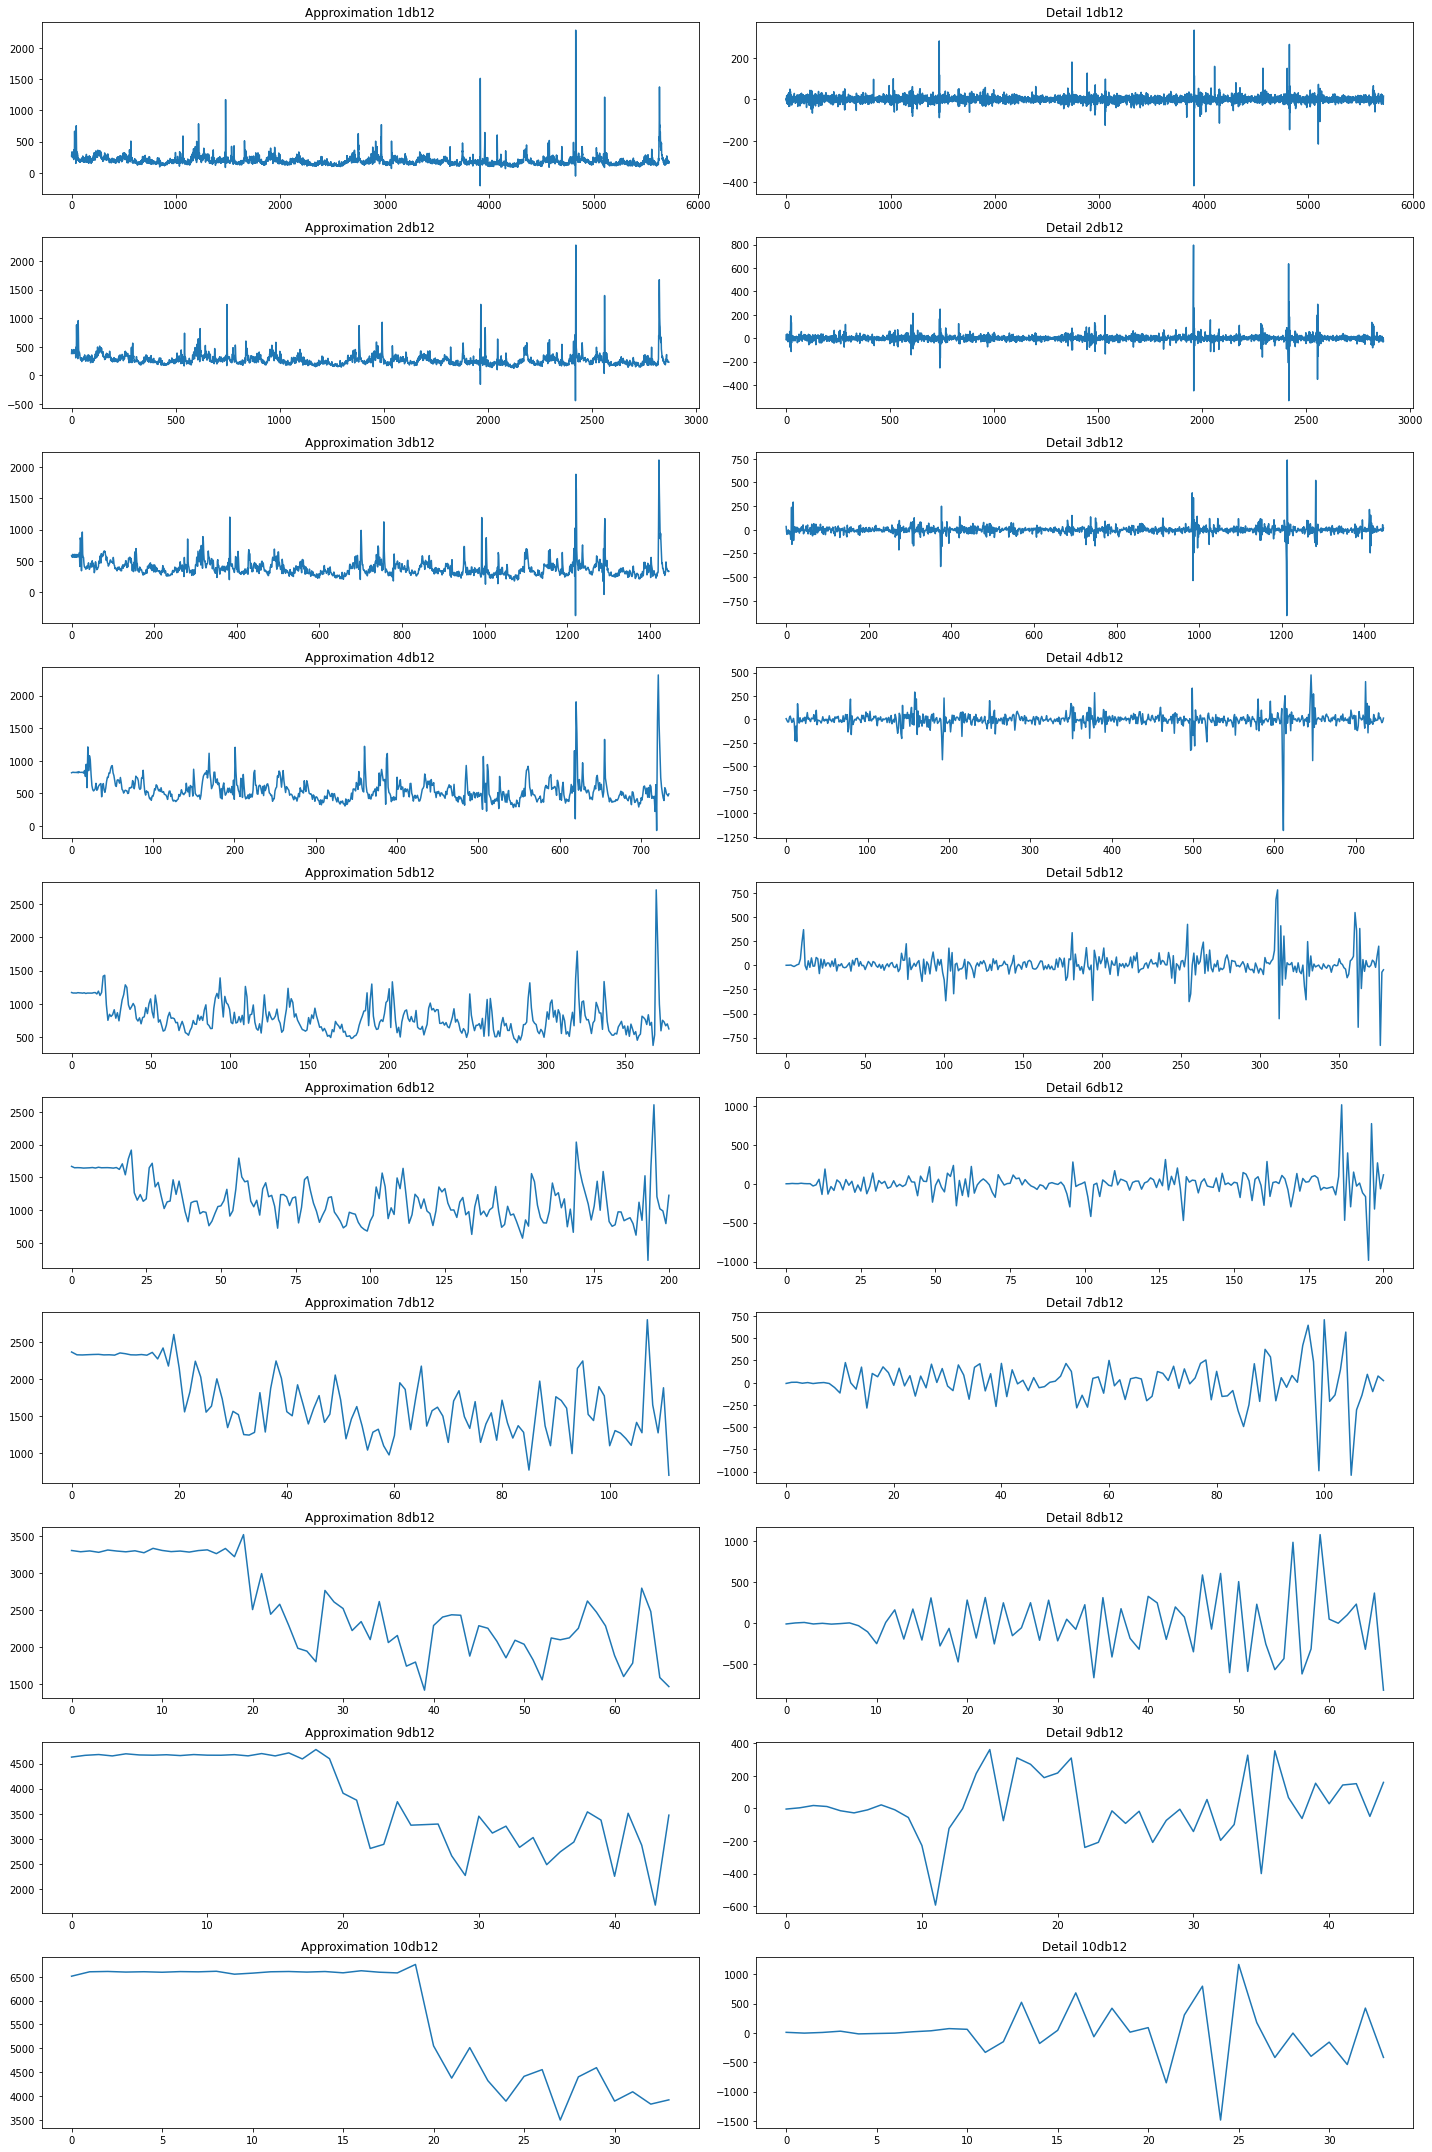

In [12]:
dwt(df, 'db12')

D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


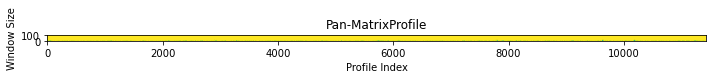

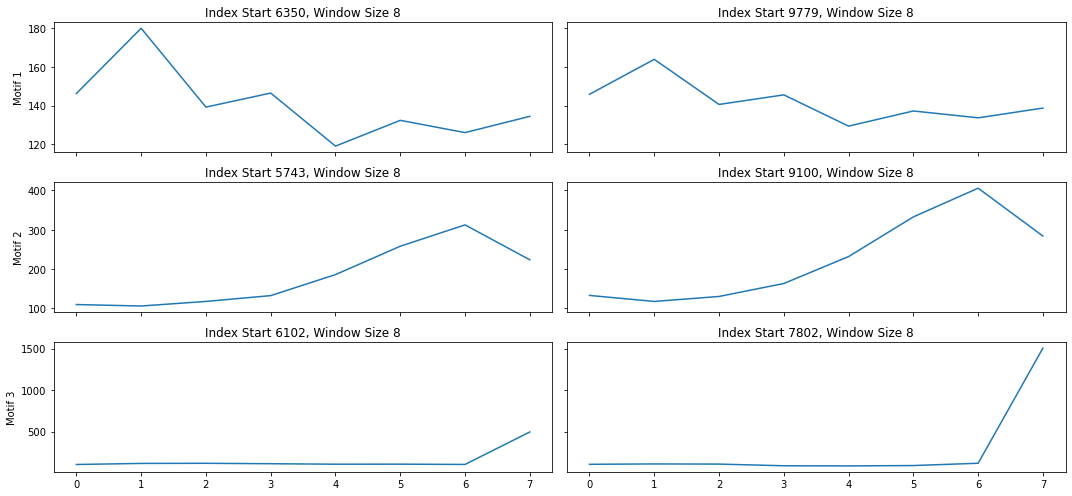

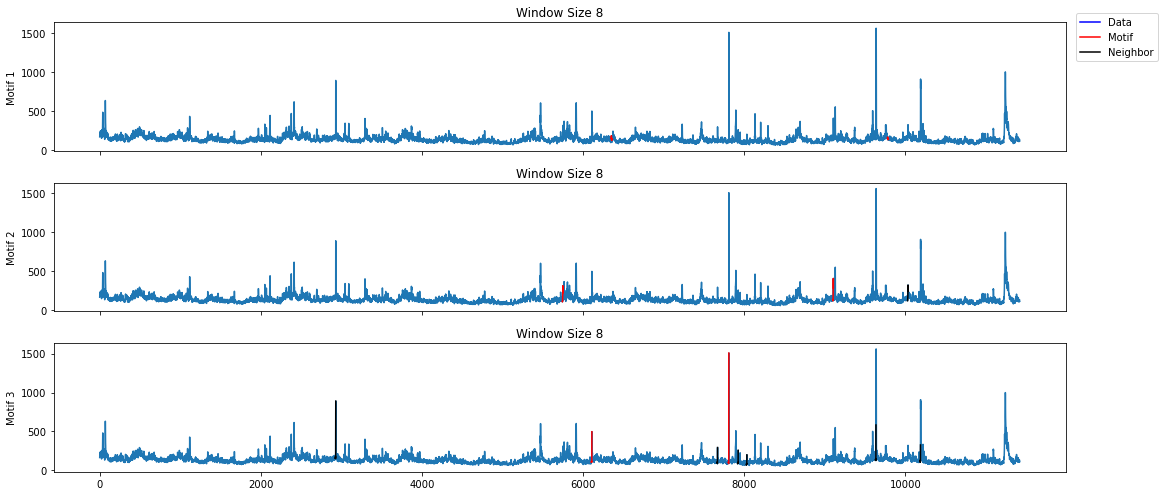

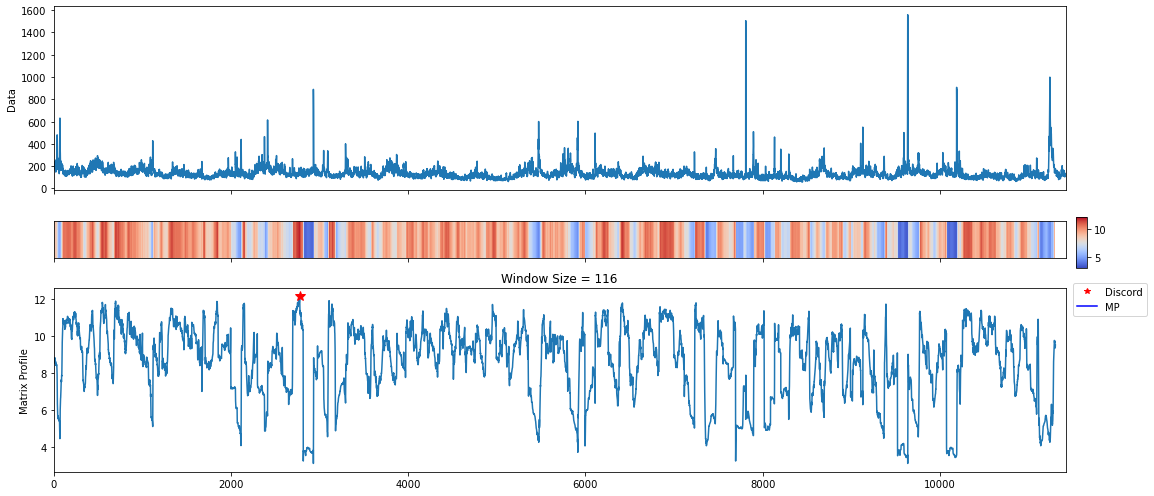

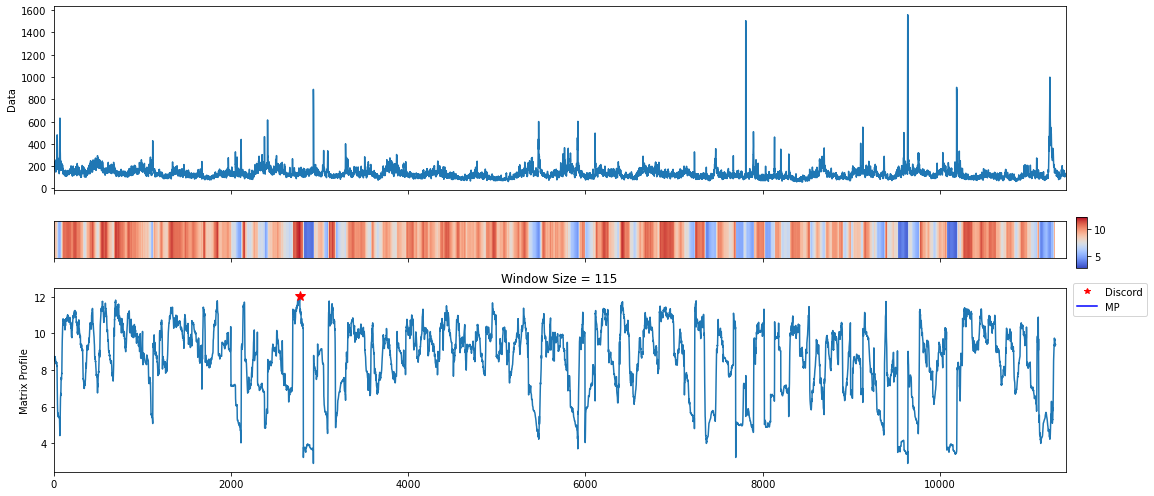

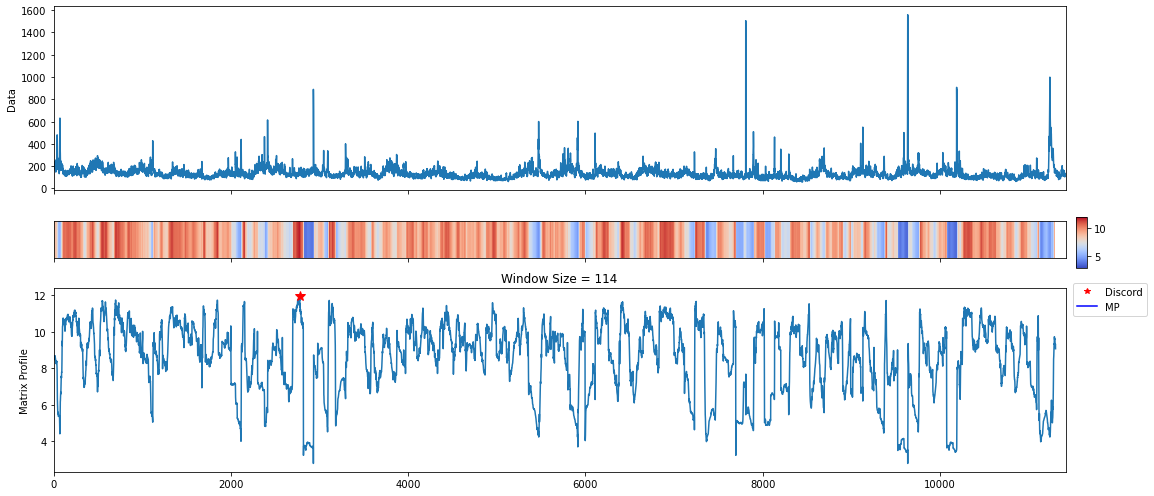

In [84]:
wavelets = ['coif4', 'db4', 'haar', 'sym4']
wavelet = 'db12'
cA1, cD1 = pywt.dwt(df, wavelet, mode='symmetric')
cA2, cD2 = pywt.dwt(cA1, wavelet, mode='symmetric')
cA3, cD3 = pywt.dwt(cA2, wavelet, mode='symmetric')
cA4, cD4 = pywt.dwt(cA3, wavelet, mode='symmetric')
cA5, cD5 = pywt.dwt(cA4, wavelet, mode='symmetric')
cA6, cD6 = pywt.dwt(cA5, wavelet, mode='symmetric')
cA7, cD7 = pywt.dwt(cA6, wavelet, mode='symmetric')
cA8, cD8 = pywt.dwt(cA7, wavelet)
cA9, cD9 = pywt.dwt(cA8, wavelet)
cA10, cD10 = pywt.dwt(cA9, wavelet)

mp_profile, mp_figures = mp.analyze(df, threshold=0.96)

D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
D:\Anaconda\lib\site-packages\matrixprofile\visualize.py:433: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


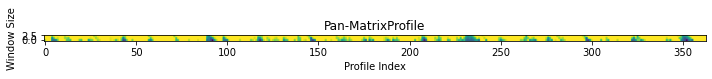

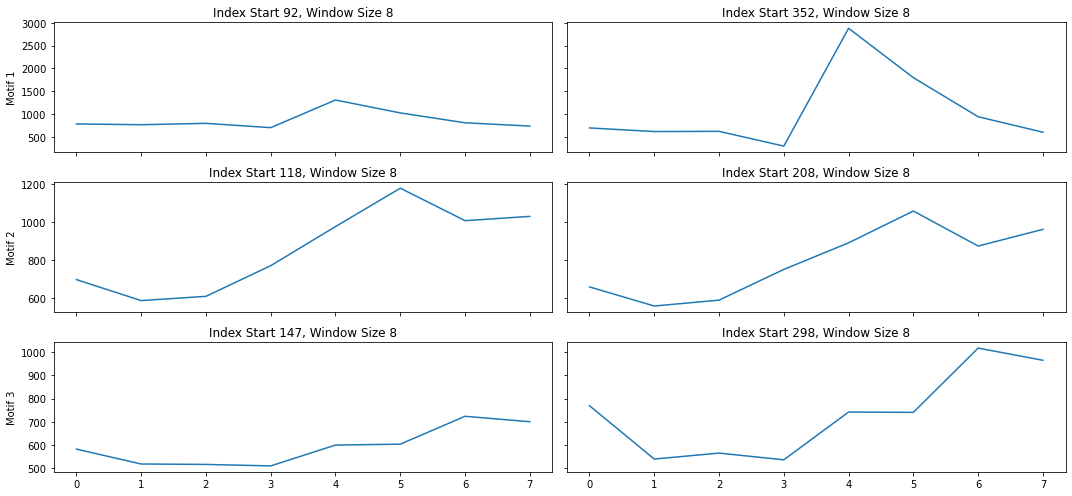

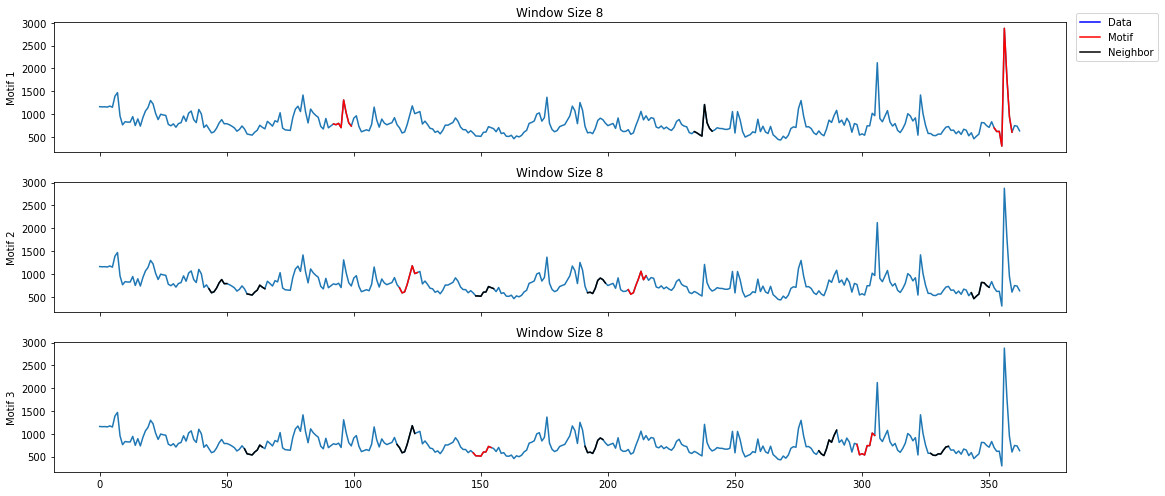

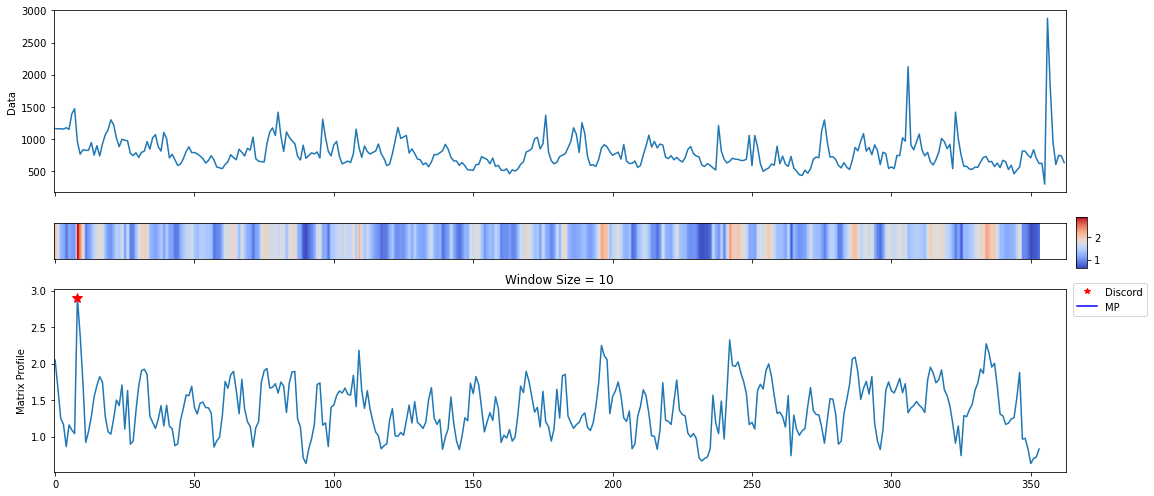

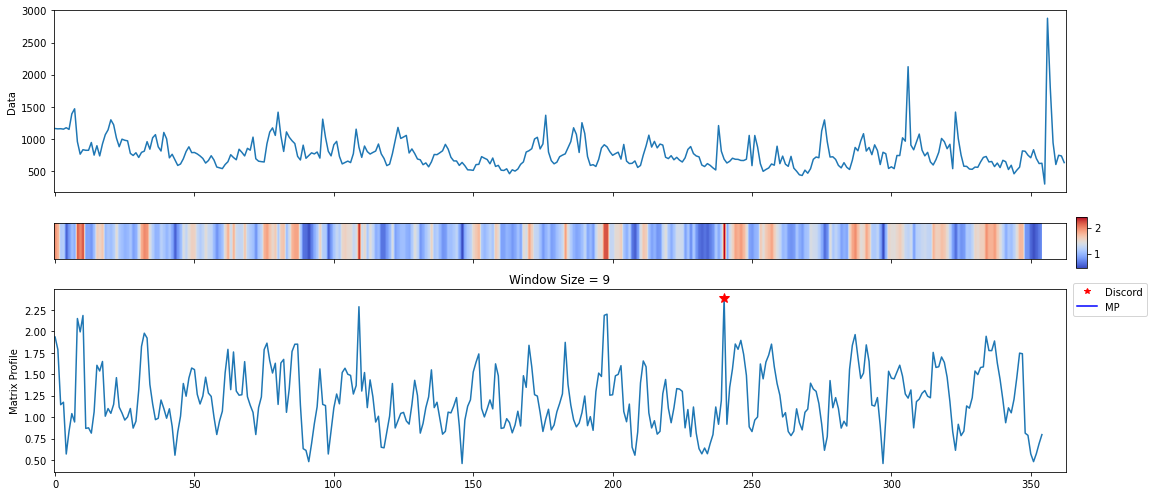

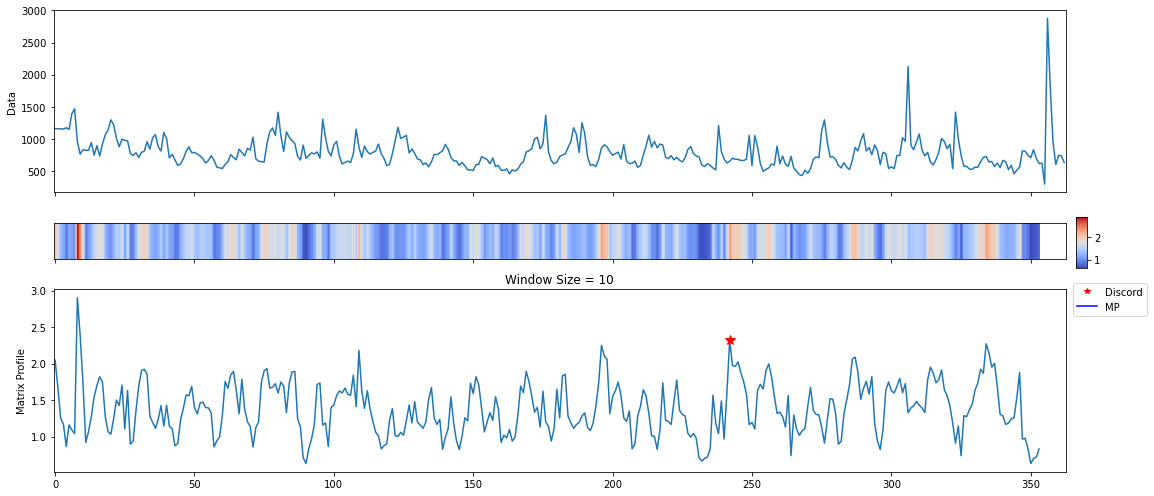

In [75]:
wavelets = ['coif4', 'db4', 'haar', 'sym4']
wavelet = 'db4'
cA1, cD1 = pywt.dwt(df, wavelet, mode='symmetric')
cA2, cD2 = pywt.dwt(cA1, wavelet, mode='symmetric')
cA3, cD3 = pywt.dwt(cA2, wavelet, mode='symmetric')
cA4, cD4 = pywt.dwt(cA3, wavelet, mode='symmetric')
cA5, cD5 = pywt.dwt(cA4, wavelet, mode='symmetric')
cA6, cD6 = pywt.dwt(cA5, wavelet, mode='symmetric')
cA7, cD7 = pywt.dwt(cA6, wavelet, mode='symmetric')
cA8, cD8 = pywt.dwt(cA7, wavelet)
cA9, cD9 = pywt.dwt(cA8, wavelet)
cA10, cD10 = pywt.dwt(cA9, wavelet)

mp_profile, mp_figures = mp.analyze(cA5)

In [69]:
cA1, cD1 = pywt.dwt(df, wavelet, mode='symmetric')
cA1_pad = pywt.pad(cA1, 5, 'symmetric')
len(cA1_pad)

5723